In [1]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
os.getcwd()

'/home/b08209033/dynamical_core/exp/shallow_water'

In [2]:
file = h5py.File('SWM.jld2', 'r')
print(file)

<HDF5 file "SWM.jld2" (mode r)>


In [3]:
for key in file.keys():
    print(key)

creation_time
damping_coef
damping_order
div_daily_mean
div_hourly_mean
end_time
h_daily_mean
h_hourly_mean
hybrid_levels
latitude
longitude
num_daily_data
num_latitude
num_longitude
num_meridional_spectral_modes
num_vertical
num_zonal_spectral_modes
q_daily_mean
q_hourly_mean
robert_coef
start_time
u_daily_mean
u_hourly_mean
v_daily_mean
v_hourly_mean
vor_daily_mean
vor_hourly_mean
Δt


In [4]:
file["Δt"][()]

60

In [6]:
file["creation_time"][()]

<HDF5 dataset "creation_time": shape (), type "|S18">

In [5]:
u = file["u_hourly_mean"]
v = file["v_hourly_mean"]
h = file["h_hourly_mean"]
vor = file["vor_hourly_mean"]
div = file["div_hourly_mean"]
lon = file["longitude"]
lat = file["latitude"]


In [10]:
print(v.shape)

(122, 1, 256, 512)


(0.0, 122.0)

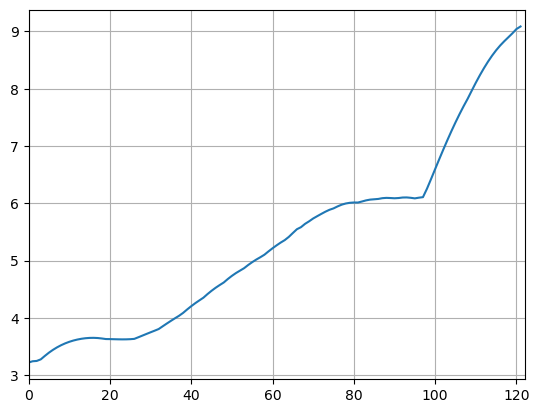

In [12]:
maxv = v[:].reshape(122,-1)
plt.grid()
plt.plot(np.max(maxv, axis = 1))
plt.xlim(0,122)
#plt.ylim(0.00,0.03)

In [13]:
lons = np.rad2deg(np.tile(lon[:].reshape(1,-1), (256,1)))
lats = np.rad2deg(np.tile(lat[:].reshape(-1,1), (1,512)))
print(lons.shape)

(256, 512)


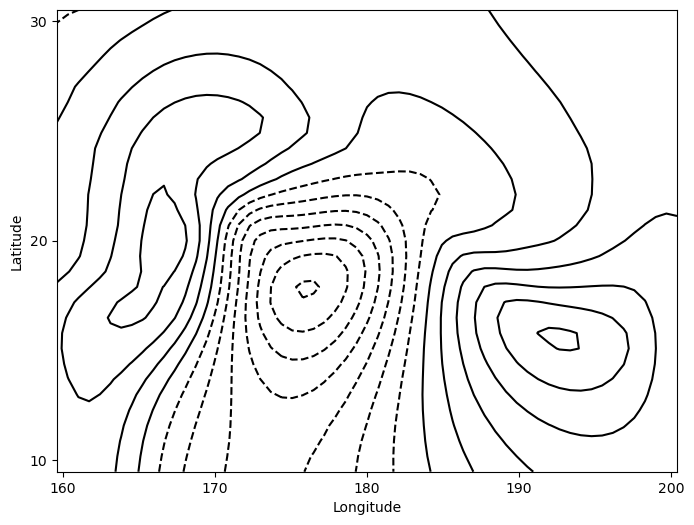

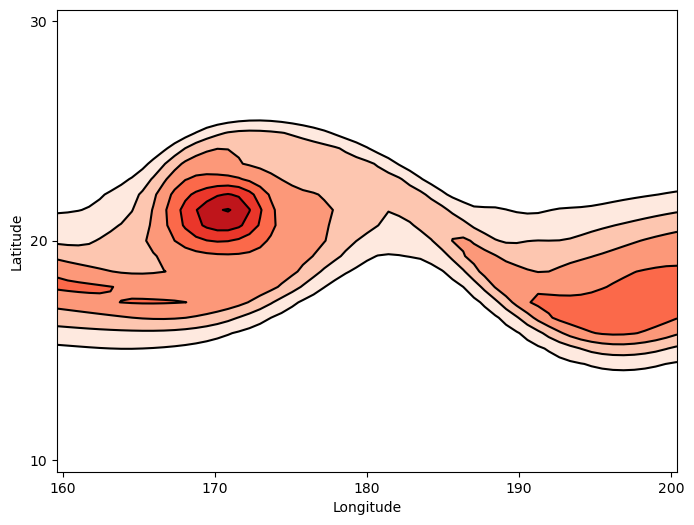

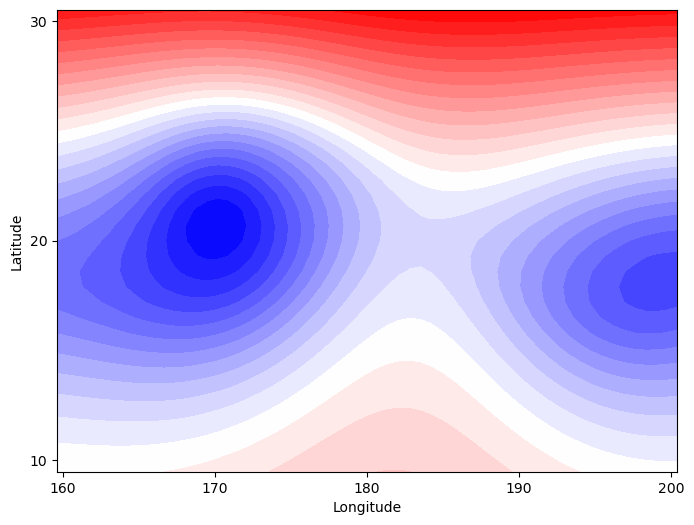

In [25]:
time = 72
x1 = 227
x2 = 286
y1 = 141
y2 = 172

plt.figure(figsize = (8,6),
           dpi = 100)
plt.contour(lons[y1:y2,x1:x2], lats[y1:y2,x1:x2], div[time,-1,y1:y2,x1:x2], levels = 13, colors = "k")
plt.xticks([160,170,180,190,200])
plt.yticks([10,20,30])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

plt.figure(figsize = (8,6),
           dpi = 100)
plt.contourf(lons[y1:y2,x1:x2], lats[y1:y2,x1:x2], vor[time,-1,y1:y2,x1:x2], levels = np.linspace(1e-5,8e-5,8), cmap = "Reds")
plt.contour(lons[y1:y2,x1:x2], lats[y1:y2,x1:x2], vor[time,-1,y1:y2,x1:x2], levels = np.linspace(1e-5,8e-5,8), colors = "k")
plt.xticks([160,170,180,190,200])
plt.yticks([10,20,30])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

plt.figure(figsize = (8,6),
           dpi = 100)
plt.contourf(lons[y1:y2,x1:x2], lats[y1:y2,x1:x2], h[time,-1,y1:y2,x1:x2], levels = 32, cmap = "bwr")
plt.xticks([160,170,180,190,200])
plt.yticks([10,20,30])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [14]:
def evolution_var_2D(data, name):
    fig, ax = plt.subplots(figsize=(16, 9),
                           dpi = 150)
    levels = np.linspace(1.1*data[:].min(), 0.9*data[:].max(), 128)
    # Animator
    def animate(i):
        ax.clear()
        im = ax.contourf(data[i,-1,:,:],
                         levels = levels,
                         extend = "both",
                         cmap='bwr')
        ax.set_title(f"{str(name)}")
        return im,
    anim = animation.FuncAnimation(fig, animate, 122, interval=100, blit=False)
    anim.save(name)
    return anim

ValueError: Contour levels must be increasing

Error in callback <function _draw_all_if_interactive at 0x7fd5a7e1c540> (for post_execute):


ValueError: Contour levels must be increasing

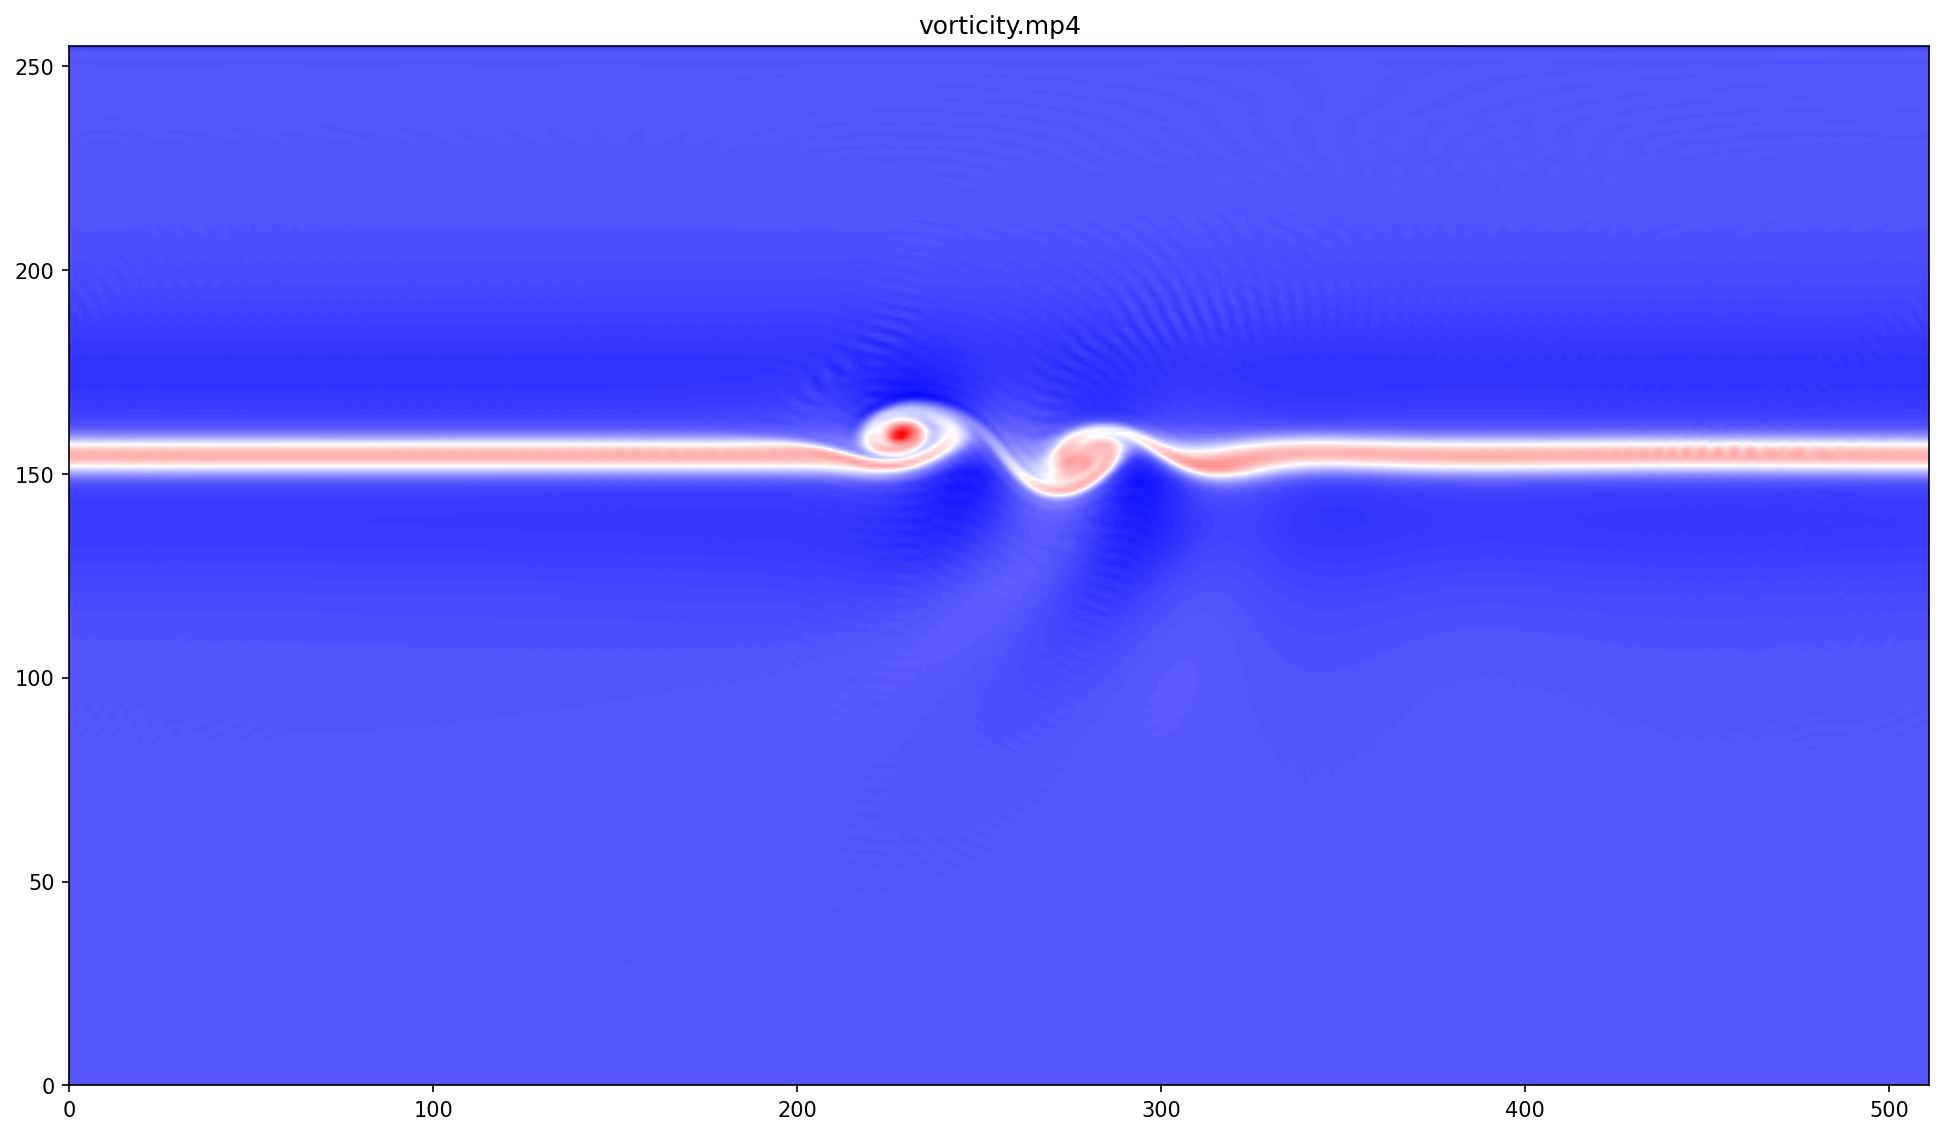

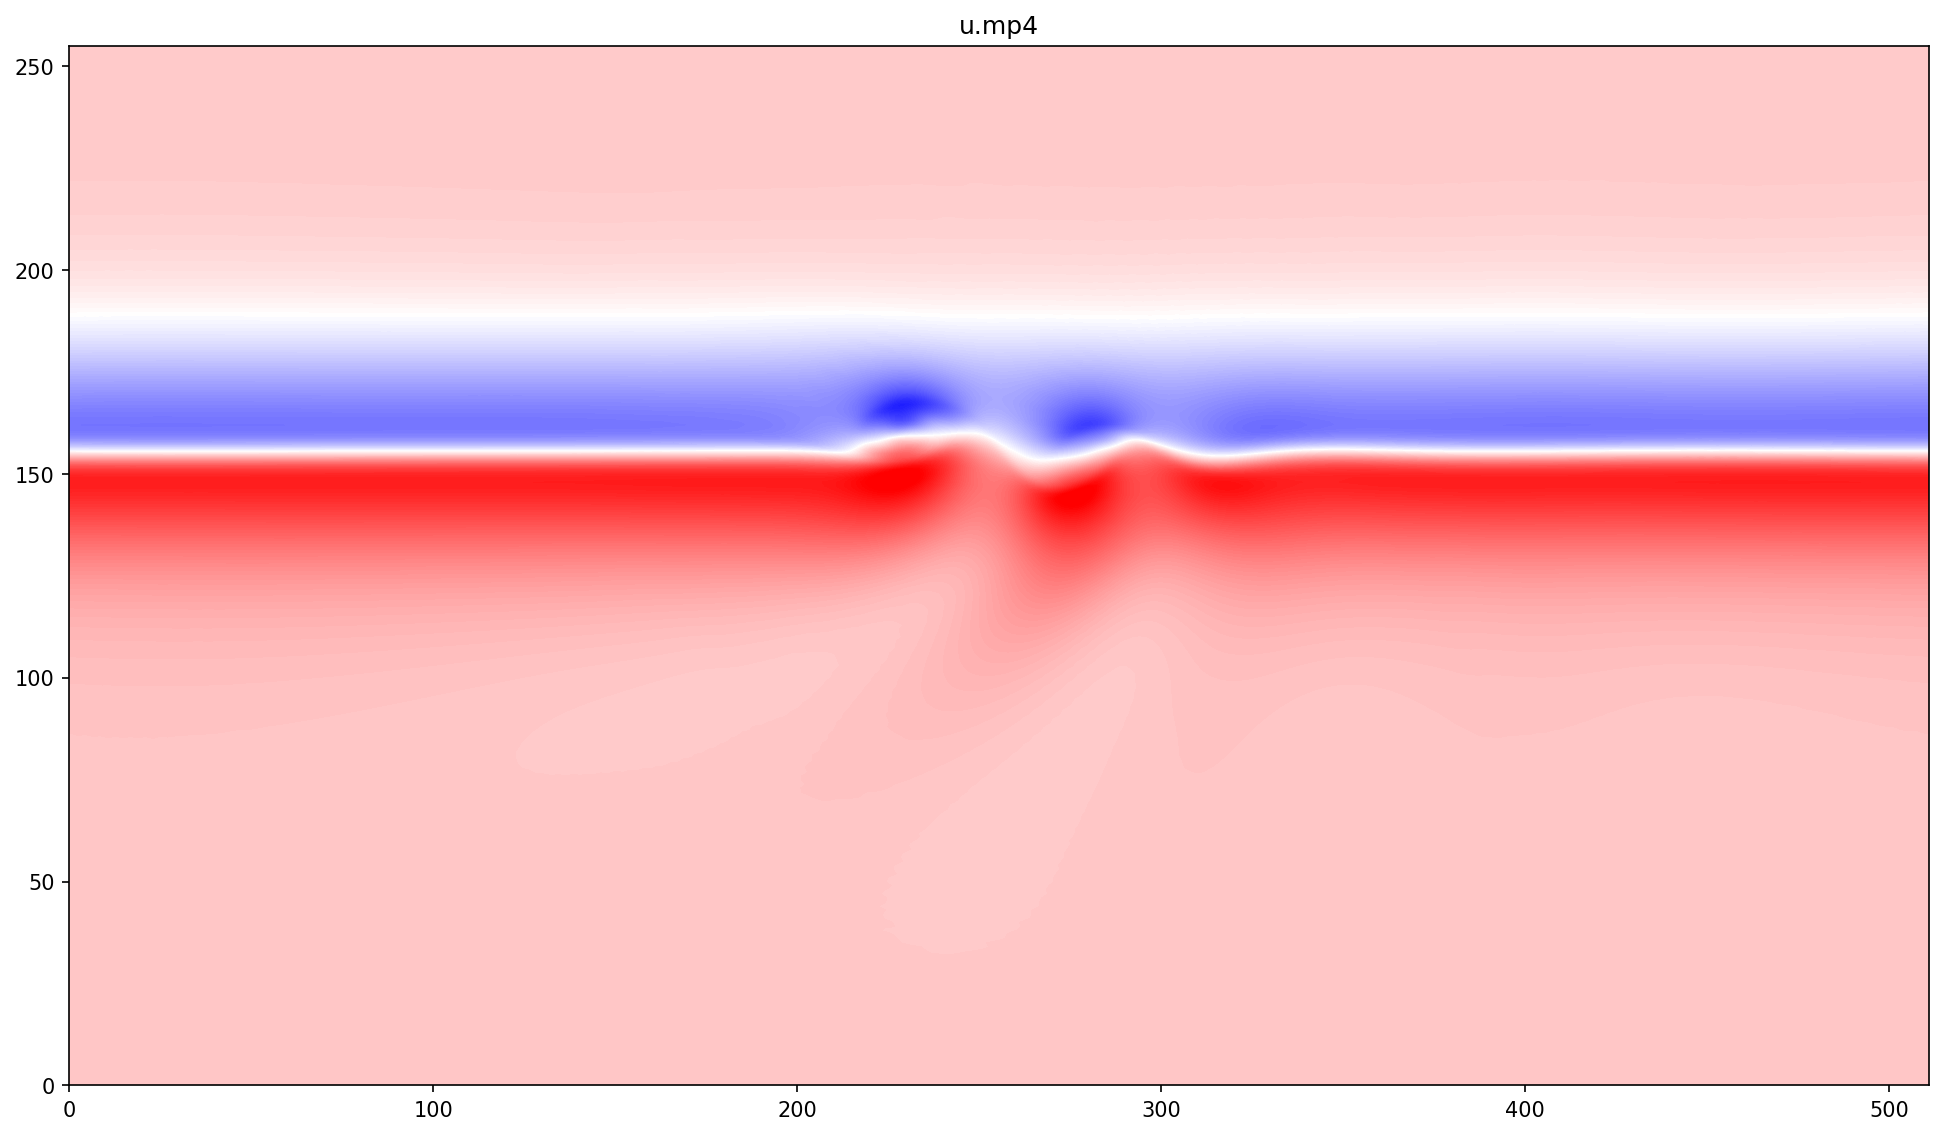

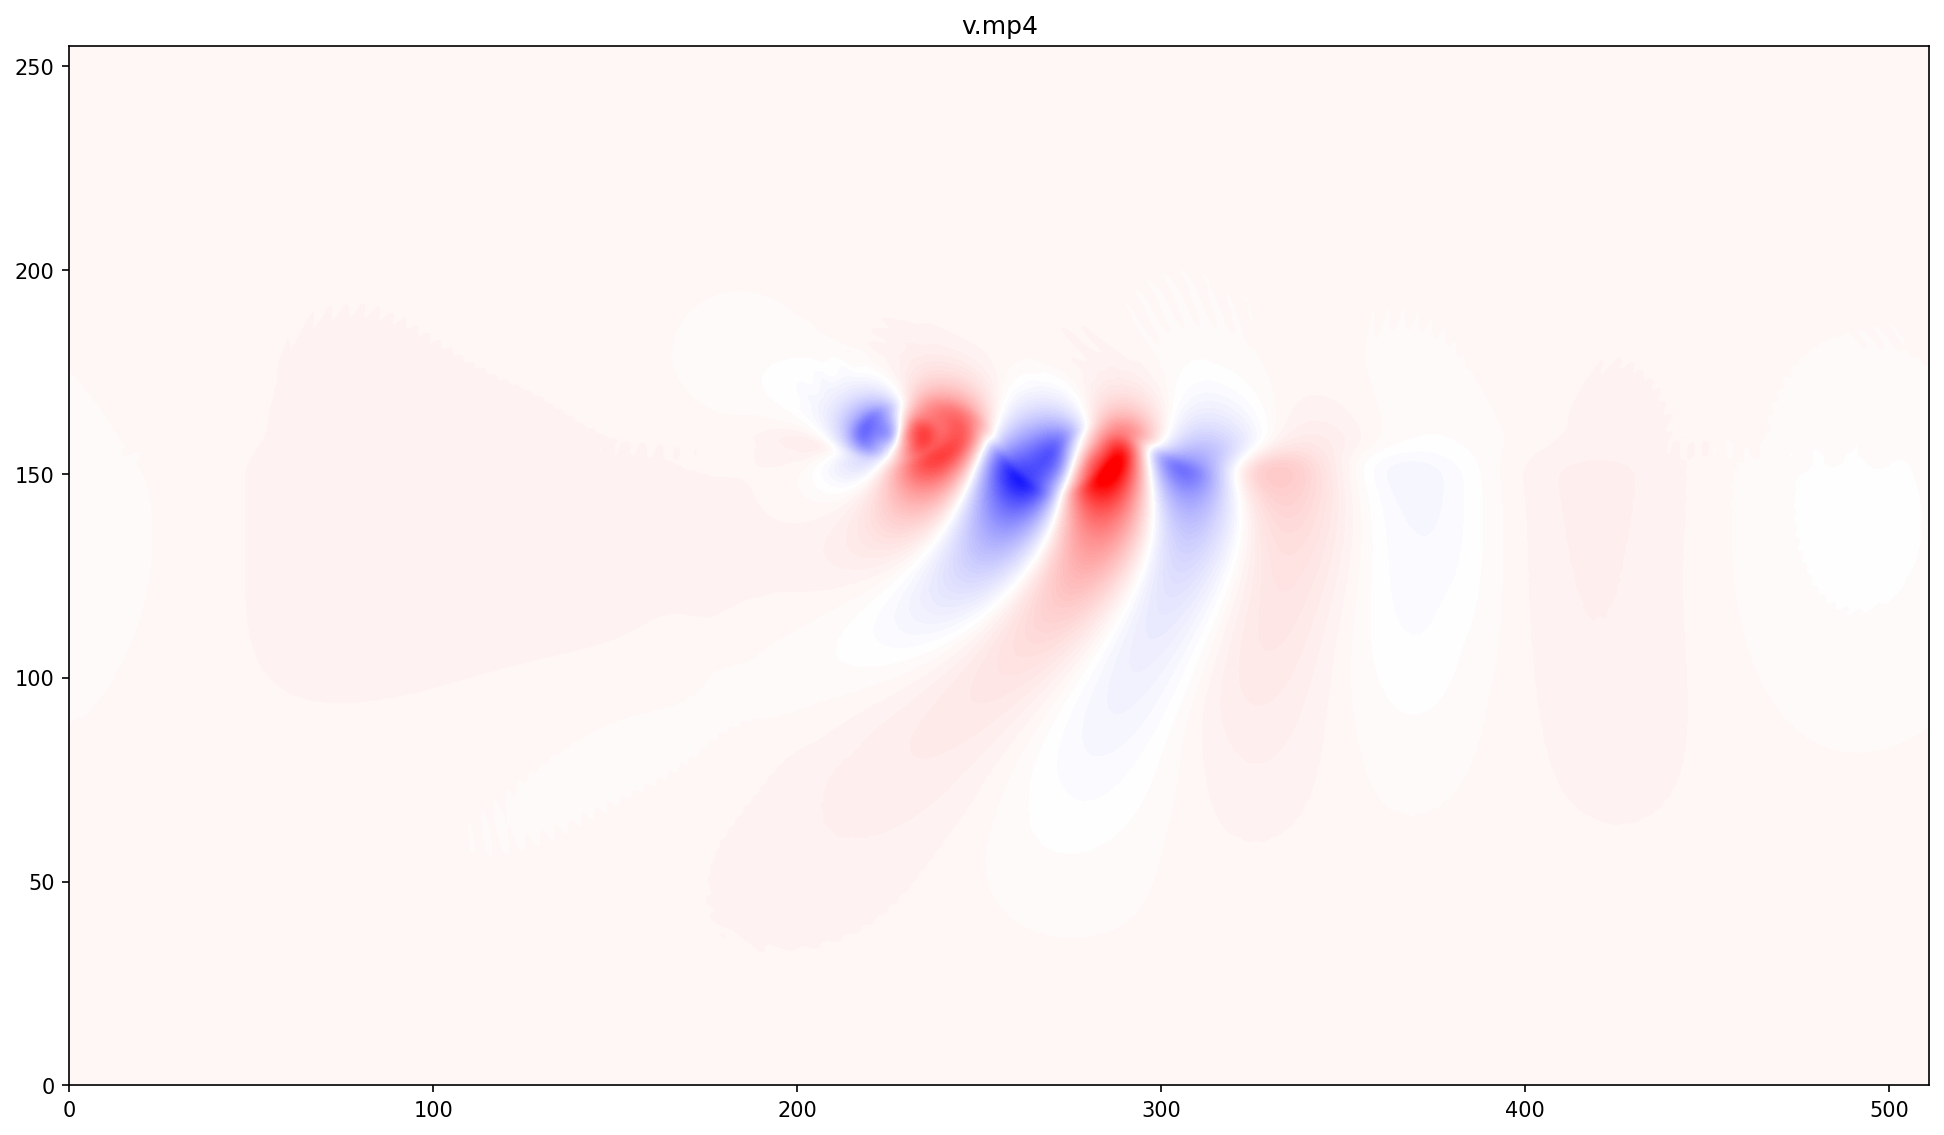

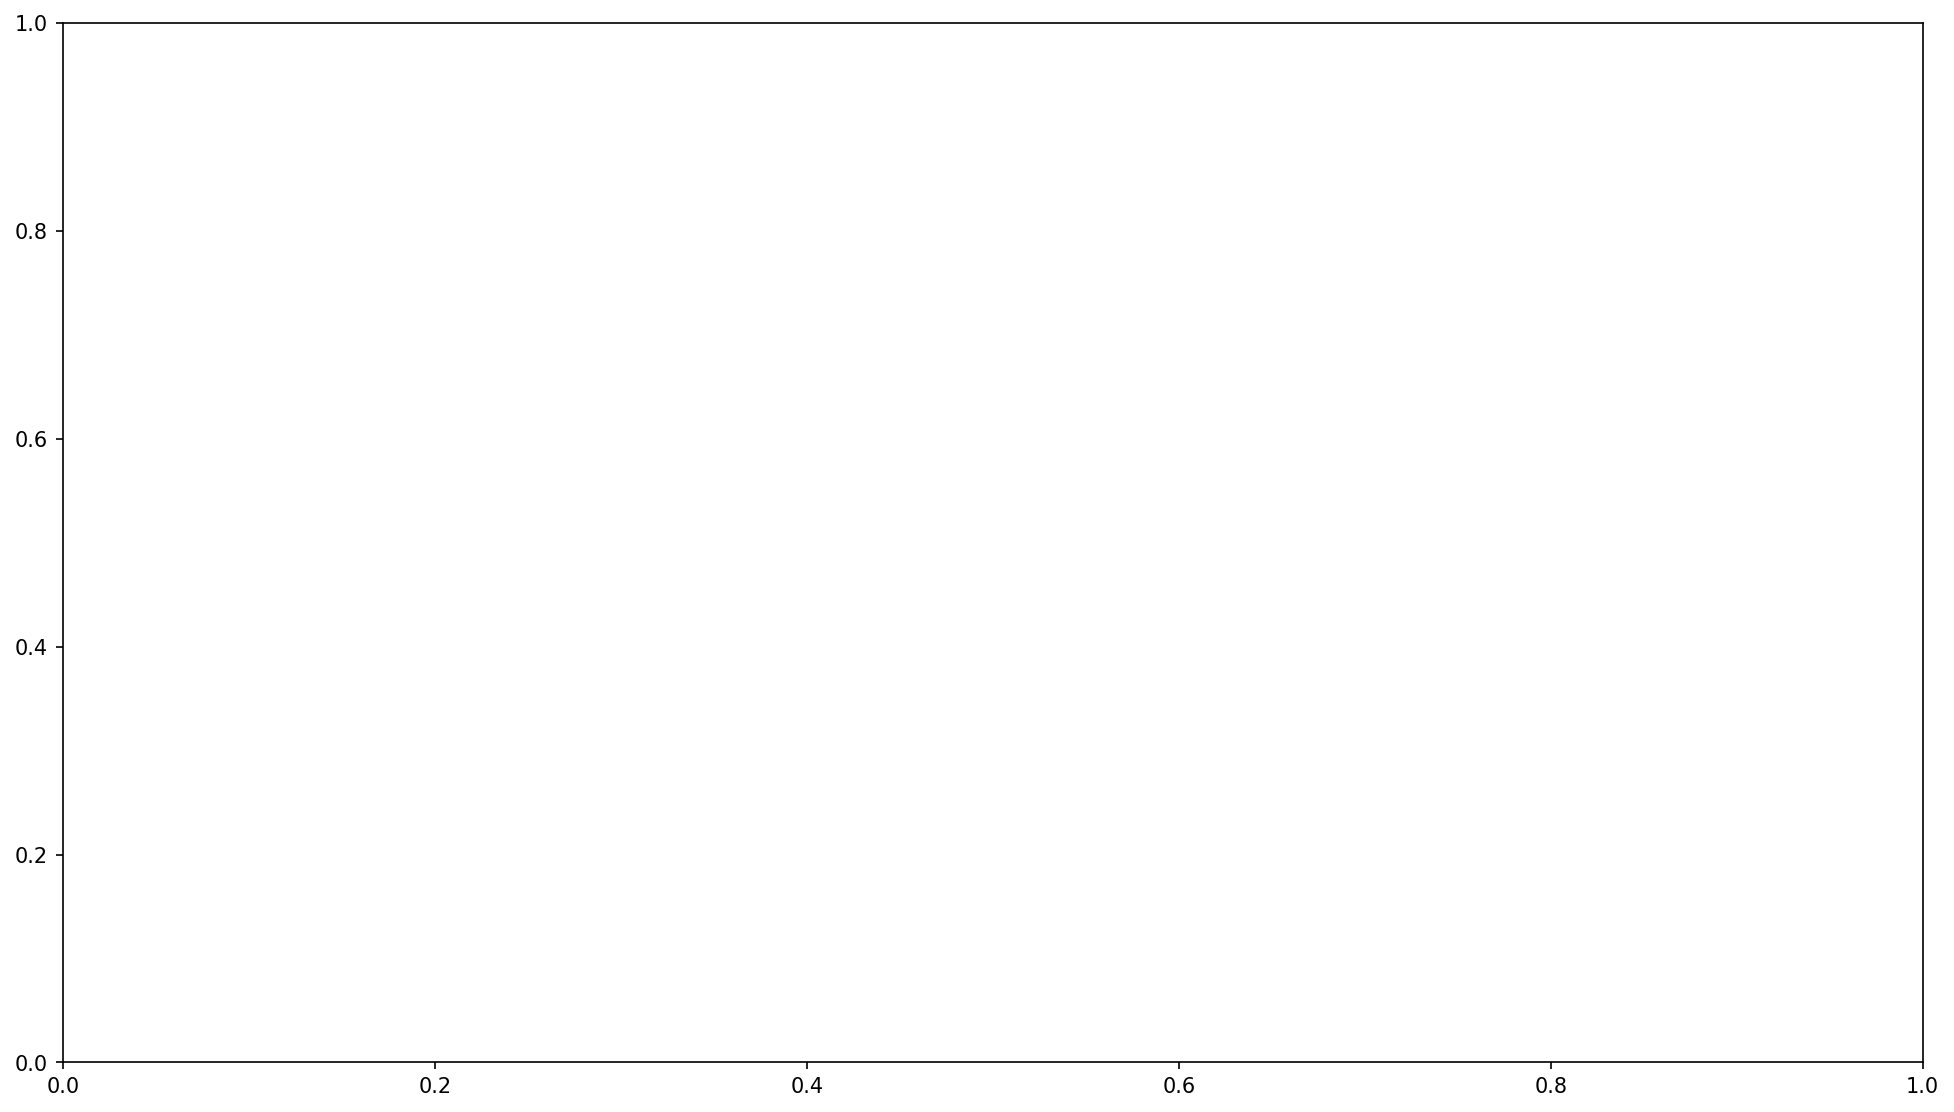

In [15]:
# evolution_var_2D(q, "water.mp4")
evolution_var_2D(vor, "vorticity.mp4")
evolution_var_2D(u, "u.mp4")
evolution_var_2D(v, "v.mp4")
evolution_var_2D(h, "h.mp4")

In [ ]:
# N = 5

# diff_matrix_1st = (- np.roll(np.eye(N), 1, axis = 0) + np.roll(np.eye(N), -1, axis = 0))/2
# diff_matrix_1st[0, :] = 0
# diff_matrix_1st[0, 0] = -1
# diff_matrix_1st[0, 1] = 1
# diff_matrix_1st[-1, :] = 0
# diff_matrix_1st[-1, -2] = -1
# diff_matrix_1st[-1, -1] = 1
# # diff_matrix_1st /= dy

# eigenvalues, eigenvectors = np.linalg.eig(diff_matrix_1st)

In [ ]:
# print(diff_matrix_1st) 
# print(eigenvectors[:,1])
# #print(eigenvalues)
# print(diff_matrix_1st@eigenvectors[:,1])
# print(eigenvalues[1]*eigenvectors[:,1])